# **Preparación de los datos**


In [1490]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, f_oneway
from utils import plot_categorical_numerical_relationship, plot_grouped_boxplots, plot_multiple_boxplots,\
     plot_categorical_relationship_fin,plot_grouped_histograms, cardi, plot_numerical_histograms, pinta_distribucion_categoricas

# **Carga de la base de datos y visualización inicial**

In [1491]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")

In [1492]:
#Observamos sus primeras columnas
df_perfil_turistico.head()

,Sexo,Edad,Nacionalidad,Viaja_solo,Viaja_pareja,Viaja_hijo,Viaja_amigos,Viaja_otros,Noches,Tipo_alojamiento,...,Situacion_laboral,Ingresos,Personas_hogar,Cuatrimestre,Canal_visitas_anteriores,Canal_familia,Canal_redes_sociales,Canal_otro,Horas_fuera_alojamiento,Año
0,6,42,España,No,No,No,No,Si,5,3,...,1,1,1,Q1,No,No,Si,No,10,2019
1,1,27,España,No,Si,No,No,No,4,4,...,1,2,2,Q1,No,No,Si,No,10,2019
2,6,63,Italia,Si,No,No,No,No,6,3,...,2,1,1,Q1,No,No,Si,No,7,2019
3,6,43,Reino Unido,No,No,Si,No,No,6,4,...,5,3,4,Q1,No,No,Si,No,4,2019
4,1,43,España,No,No,No,No,Si,4,4,...,1,2,1,Q1,No,No,Si,No,14,2019


# **Limpieza de los datos**

In [1493]:
#Limpieza de variables categóticas
# Se sabe que en la variable sexo 1=Hombre y 6=Mujer por lo que vamos a hacer la transformacion
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})

In [1494]:
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})

In [1495]:
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})


In [1496]:
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})

In [1497]:
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})

In [1498]:
#Satisfacción
df_perfil_turistico["Satisfacción"] = df_perfil_turistico["Satisfacción"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [1499]:
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [1500]:
#Recomendación
df_perfil_turistico["Recomendaria"] = df_perfil_turistico["Recomendaria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [1501]:
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})

In [1502]:
#Creamos una columna con el tipo de aconmpañante
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)


In [1503]:
#Eliminamos la columna Tipo de viaje
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])

In [1504]:
#Creamos una columna con el tipo de canal
columnas_tipo_canal = ["Canal_visitas_anteriores", "Canal_familia", "Canal_redes_sociales", "Canal_otro"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Canal"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_canal if row[col] == "Si"), axis=1)


In [1505]:
#Eliminamos la columna Tipo de canales
df_perfil_turistico = df_perfil_turistico.drop(columns=["Canal_visitas_anteriores", "Canal_familia", "Canal_redes_sociales", "Canal_otro"])

In [1506]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12492 entries, 0 to 12491
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12492 non-null  object 
 1   Edad                     12492 non-null  int64  
 2   Nacionalidad             12492 non-null  object 
 3   Noches                   12492 non-null  int64  
 4   Tipo_alojamiento         12492 non-null  object 
 5   Coste_vuelos             12492 non-null  float64
 6   Coste_alojamiento        12492 non-null  float64
 7   Visitas_totales_Islas    12492 non-null  int64  
 8   Visitas_total_GC         12492 non-null  int64  
 9   Satisfacción             12492 non-null  object 
 10  Calificacion             12492 non-null  object 
 11  Repetiria                12492 non-null  object 
 12  Recomendaria             12492 non-null  object 
 13  Nivel_educativo          12492 non-null  object 
 14  Situacion_laboral     

In [1507]:
# Convertir algunas columnas a float
df_perfil_turistico['Edad'] = df_perfil_turistico['Edad'].astype(float)
# Verificar el cambio
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12492 entries, 0 to 12491
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12492 non-null  object 
 1   Edad                     12492 non-null  float64
 2   Nacionalidad             12492 non-null  object 
 3   Noches                   12492 non-null  int64  
 4   Tipo_alojamiento         12492 non-null  object 
 5   Coste_vuelos             12492 non-null  float64
 6   Coste_alojamiento        12492 non-null  float64
 7   Visitas_totales_Islas    12492 non-null  int64  
 8   Visitas_total_GC         12492 non-null  int64  
 9   Satisfacción             12492 non-null  object 
 10  Calificacion             12492 non-null  object 
 11  Repetiria                12492 non-null  object 
 12  Recomendaria             12492 non-null  object 
 13  Nivel_educativo          12492 non-null  object 
 14  Situacion_laboral     

In [1508]:
#¿Valores duplicados?
df_perfil_turistico.duplicated(keep=False)
len(df_perfil_turistico[df_perfil_turistico.duplicated(keep = False)]) # keep = "first", keep = False

0

In [1509]:
#¿Valores nulos?
df_perfil_turistico.isnull()
df_perfil_turistico.isnull().sum()

Sexo                       0
Edad                       0
Nacionalidad               0
Noches                     0
Tipo_alojamiento           0
Coste_vuelos               0
Coste_alojamiento          0
Visitas_totales_Islas      0
Visitas_total_GC           0
Satisfacción               0
Calificacion               0
Repetiria                  0
Recomendaria               0
Nivel_educativo            0
Situacion_laboral          0
Ingresos                   0
Personas_hogar             0
Cuatrimestre               0
Horas_fuera_alojamiento    0
Año                        0
Modo_viaje                 0
Canal                      0
dtype: int64

In [1510]:
#Vemos el total de columnas
df_perfil_turistico.columns

Index(['Sexo', 'Edad', 'Nacionalidad', 'Noches', 'Tipo_alojamiento',
       'Coste_vuelos', 'Coste_alojamiento', 'Visitas_totales_Islas',
       'Visitas_total_GC', 'Satisfacción', 'Calificacion', 'Repetiria',
       'Recomendaria', 'Nivel_educativo', 'Situacion_laboral', 'Ingresos',
       'Personas_hogar', 'Cuatrimestre', 'Horas_fuera_alojamiento', 'Año',
       'Modo_viaje', 'Canal'],
      dtype='object')

In [1511]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12492 entries, 0 to 12491
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     12492 non-null  object 
 1   Edad                     12492 non-null  float64
 2   Nacionalidad             12492 non-null  object 
 3   Noches                   12492 non-null  int64  
 4   Tipo_alojamiento         12492 non-null  object 
 5   Coste_vuelos             12492 non-null  float64
 6   Coste_alojamiento        12492 non-null  float64
 7   Visitas_totales_Islas    12492 non-null  int64  
 8   Visitas_total_GC         12492 non-null  int64  
 9   Satisfacción             12492 non-null  object 
 10  Calificacion             12492 non-null  object 
 11  Repetiria                12492 non-null  object 
 12  Recomendaria             12492 non-null  object 
 13  Nivel_educativo          12492 non-null  object 
 14  Situacion_laboral     

Ya tenemos los datos limpios y listos para porder empezar con su análisis.

Empecemos con la tipología de las variables definiendo su cardinalidad para su posterior clasificación.

In [1512]:
# Calculemos ahora su cardinalidad
cardinalidad = round((df_perfil_turistico.nunique() /len (df_perfil_turistico))*100,2)
cardinalidad


Sexo                        0.02
Edad                        0.58
Nacionalidad                0.13
Noches                      0.24
Tipo_alojamiento            0.06
Coste_vuelos               18.00
Coste_alojamiento          23.82
Visitas_totales_Islas       0.20
Visitas_total_GC            0.21
Satisfacción                0.09
Calificacion                0.04
Repetiria                   0.09
Recomendaria                0.09
Nivel_educativo             0.03
Situacion_laboral           0.09
Ingresos                    0.03
Personas_hogar              0.15
Cuatrimestre                0.03
Horas_fuera_alojamiento     0.20
Año                         0.02
Modo_viaje                  0.04
Canal                       0.03
dtype: float64

In [1513]:
# Calculemos ahora su cardinalidad
def cardi(df_in,umbral_categoria, umbral_continua):
    df_cardi= df_cardi = pd.DataFrame({
    "Cardi": df_in.nunique(),
    "% Cardi": df_in.nunique() / len(df_in) * 100
})
    clasificacion= []
    for index, valor in df_cardi["Cardi"].items():
        if valor==2:
            clasificacion.append("Binaria")
        elif valor < umbral_categoria:
            clasificacion.append("Categorica")
        elif valor >= umbral_categoria:
            if df_cardi.loc[index, "% Cardi"] >= umbral_continua:
                clasificacion.append("Numerica Continua")
            else:
                clasificacion.append("Numerica Discreta")
    df_cardi["Clasificacion"]=clasificacion
    return df_cardi

In [1514]:
cardi(df_perfil_turistico,12,65)

,Cardi,% Cardi,Clasificacion
Sexo,2,0.016010,Binaria
Edad,72,0.576369,Numerica Discreta
Nacionalidad,16,0.128082,Numerica Discreta
Noches,30,0.240154,Numerica Discreta
Tipo_alojamiento,7,0.056036,Categorica
Coste_vuelos,2249,18.003522,Numerica Discreta
Coste_alojamiento,2976,23.823247,Numerica Discreta
Visitas_totales_Islas,25,0.200128,Numerica Discreta
Visitas_total_GC,26,0.208133,Numerica Discreta
Satisfacción,11,0.088056,Categorica


# **Análisis**

Una vez determinada la cardinalidad, podemos comprender mejor las variables y definirlas en la siguiente tabla. Esta tabla nos servirá como guía para identificar cada variable y aplicar el análisis adecuado a cada una de ellas.

|Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Sexo| Sexo del entrevistado: Hombre o mujer|Binaria|1|Explica análisis demográfico|
|Edad| Edad del encuestado|Numérica Discreta|1|Explica análisis demográfico|
|Nacionalidad|Nacionalidad del turista|Categórica|1|Explica análisis demográfico|
|Noches|Número de noches que pernoctó en la isla|Númerica Discreta|1|Define el comportamiento del gasto|
|Tipo_alojamiento| Tipo de alojamiento que se hospedó|Categórica|1|Define el comportamiento del gasto|
|Coste_vuelos|Coste en euros del billete de avión|Numérica Discreta|1|Define el comportamiento del gasto|
|Coste_alojamiento|Coste en euros de las noches alojadas|Numérica Discreta|1|Define el comportamiento del gasto|
|Visitas_totales_Islas| Número de veces que ha visitados las Islas Canarias|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Visitas_total_GC| Número de veces que ha estado en Gran Canaria|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Satisfaccióm| Satisfacción del 1-10 de su estancia en GC|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Calificacion| Calificación del 1-10 de su viaje|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Repetiria| Del 1-10 el valor de repetición|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Recomendaria| Del 1-10 el valor de recomendación|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Nivel_educativo| Nivel educativo|Categórica|1|Explica análisis demográfico|
|Situacion_laboral| Situación laboral|Categórica|1|Explica análisis demográfico|
|Ingresos| Ingresos por tramos, del turista|Categórica|1|Explica análisis demográfico|
|Personas_hogar| Número de personas del hogar |Numérica Discreta|1|Explica análisis demográfico|
|Cuatrimestre| Cuatrimestre de estudio|Categórica|1|Temporadas del estudio|
|Horas_fuera_alojamiento| Horas fuera del alojamiento|Numérica discreta|3|Comportamiento durante la estancia|
|Año| 2019 -2022|Binaria|1|Define los datos antes y después de pandemia|
|Modo viaje| Tipo de acompañante|Categórica|1|Define el comportamiento del gasto|
|Canal| Tipo de canal de destino|Categórica|3|Comportamiento previa a la estancia|

# **Análisis Univariante**

# *Variables Categóricas*

Análisis univariante de las variables categóricas

In [1515]:
#Variables categóricas 
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Satisfacción","Calificacion","Repetiria","Recomendaria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje","Canal"]

In [1516]:
df_perfil_turistico.Año.value_counts()

Año
2022    6404
2019    6088
Name: count, dtype: int64

In [1517]:
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]

In [1518]:
#Perfil del turista
df_2019[variables_categoricas].mode()

,Sexo,Nacionalidad,Tipo_alojamiento,Satisfacción,Calificacion,Repetiria,Recomendaria,Nivel_educativo,Situacion_laboral,Ingresos,Modo_viaje,Canal
0,Mujer,Alemania,Hotel 4*,(10),A la altura de las expectativas,(10),(10),Estudios superiores,Asalariado,25.000-49.999,Viaja_pareja,Canal_redes_sociales


In [1519]:
df_2022[variables_categoricas].mode()

,Sexo,Nacionalidad,Tipo_alojamiento,Satisfacción,Calificacion,Repetiria,Recomendaria,Nivel_educativo,Situacion_laboral,Ingresos,Modo_viaje,Canal
0,Mujer,España,Hotel 4*,(10),A la altura de las expectativas,(10),(10),Estudios superiores,Asalariado,25.000-49.999,Viaja_pareja,Canal_visitas_anteriores


***Antes de pandemia***

La moda revela que el perfil predominante del turista es el de una mujer procedente de Alemania. Este turista se aloja en hoteles de cuatro estrellas, disfruta de su estancia, alcanzando sus expectativas, y, sin duda, volvería y recomendaría el destino. Su perfil suele incluir estudios superiores y un nivel de ingresos de entre 25.000 y 50.000 euros. Generalmente, viaja en pareja, habiendo visitado las islas previamente.

***Post pandemia***

El perfil se mantiene igual, solo cambia que la procedencia sea más común desde España 

Esto muestra un cambio de comportamiento en cuanto a la nacionalidad de origen del turista, manteniendo el resto del perfil igual. Esto se explica a que debido a las restricciones que se aplicaron en los diferentes paises, y por cercanía, a un turista español le fuera más facil ir a la isla que al resto de nacionalidades.

***Análisis de frecuencias absolutas y relativas***

Para este estudio, debido a la cantidad de variables, es mejor verlo de manera gráfica

# **Gráficos variables categóricas**

**2019**

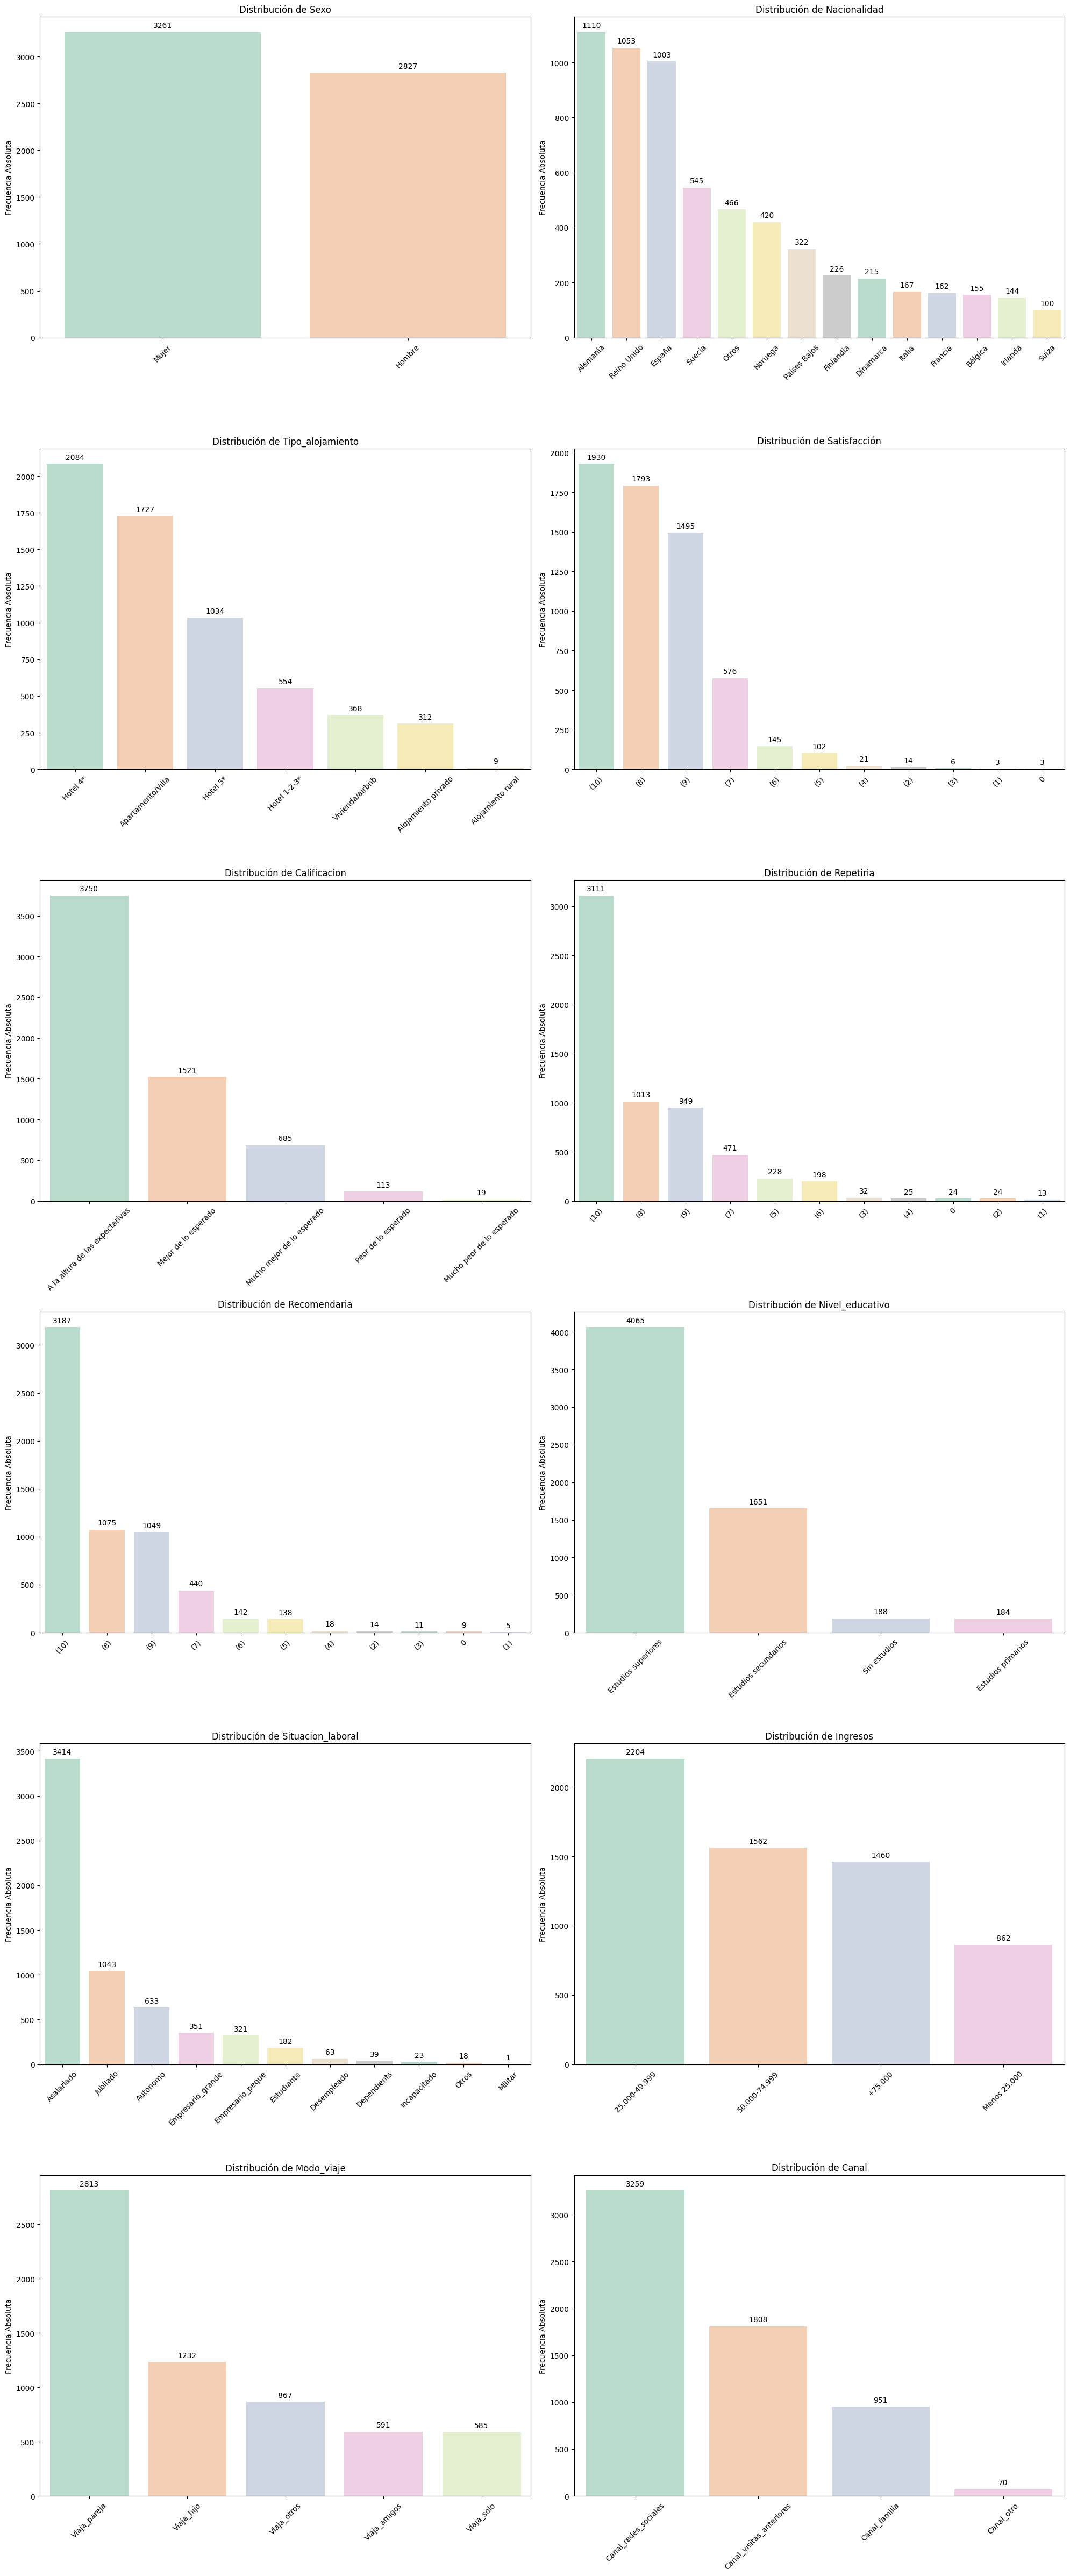

In [1520]:
pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=False,mostrar_valores=True)

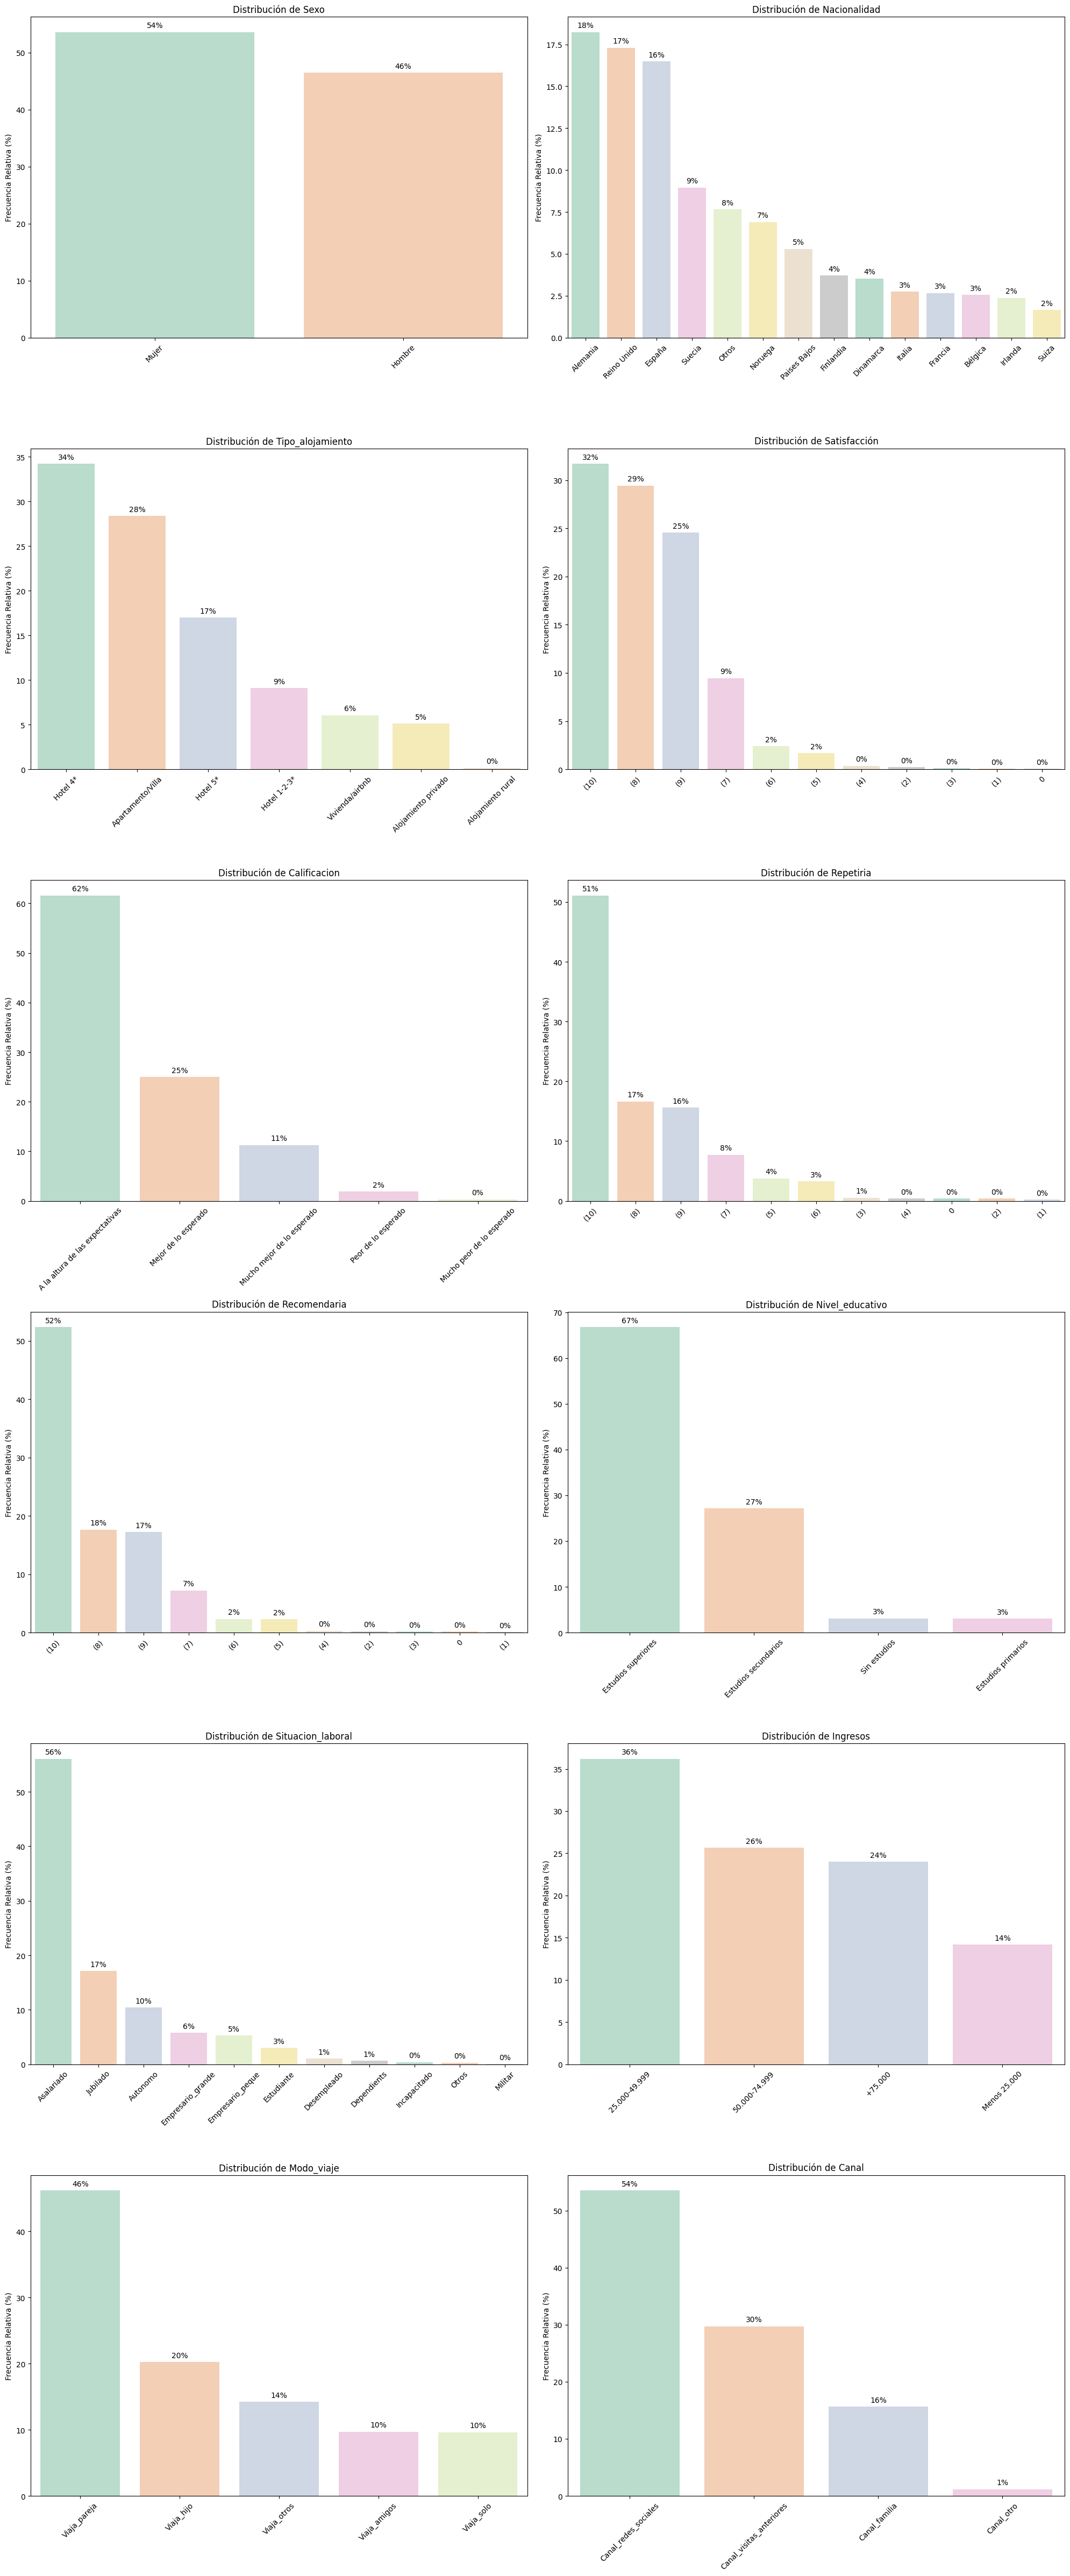

In [1521]:
pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=True,mostrar_valores=True)

**2022**


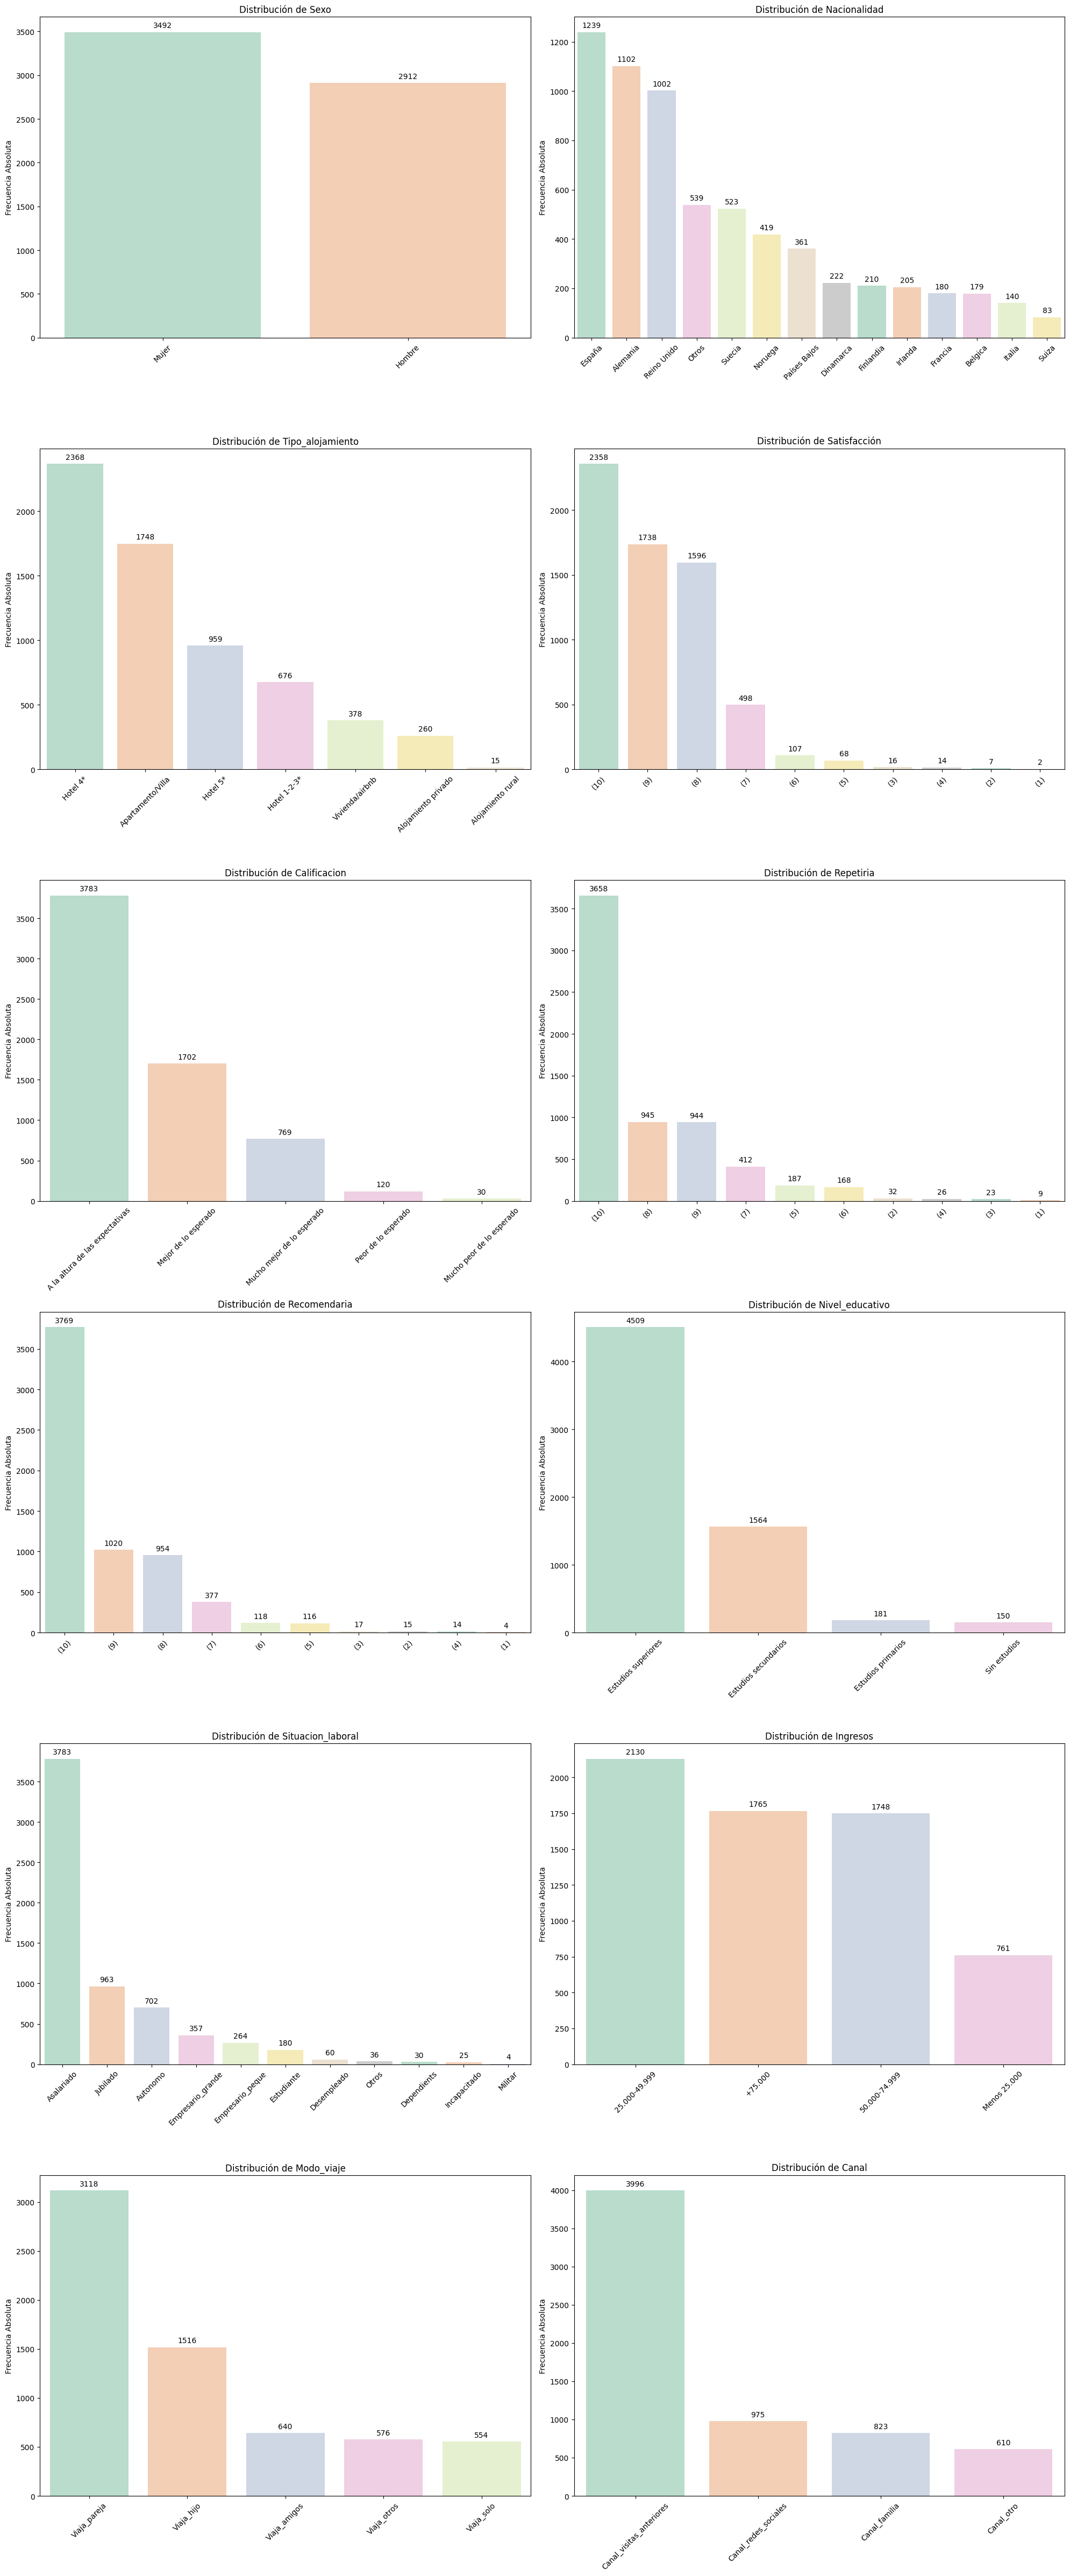

In [1522]:
pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=False,mostrar_valores=True)

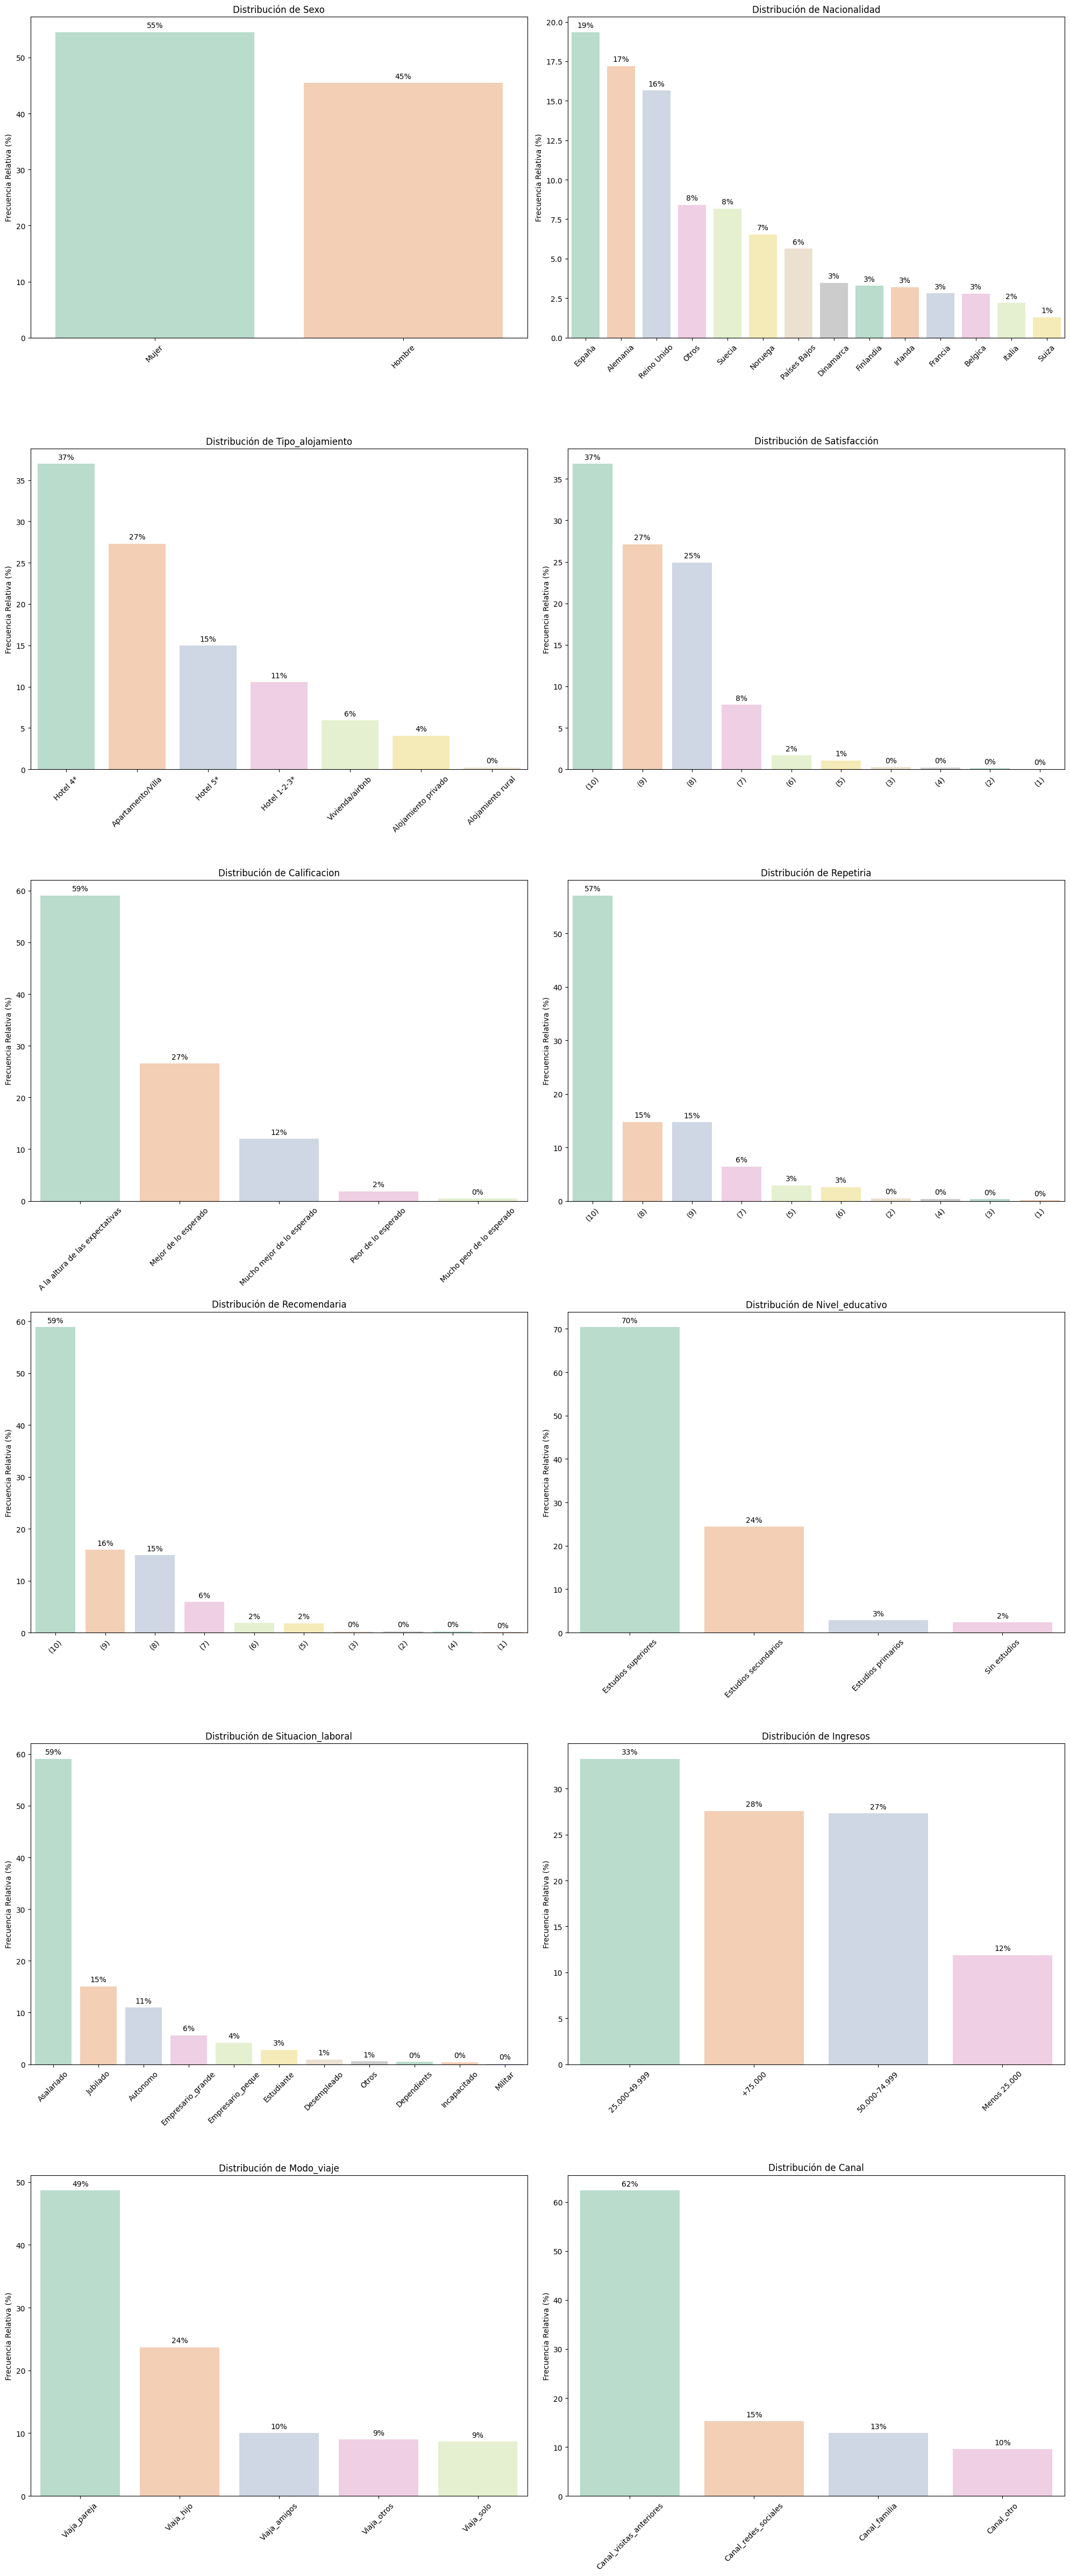

In [1523]:
pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=True,mostrar_valores=True)

# **Resumen analisis univariante de las variables categóricas**

|Variables|2019|2022|
|-|-|-|
|Sexo (mujeres)| 54% |54% |
|Nacionalidad|18% Alemania - 17% Reino Unido - 16% España|19% España -17% Alemania- 16% Reino Unido|
|Tipo de alojamiento (hotel 4*)|54%|37%|
|Satisfacción (10)|32%|37%|
|Calificación (10)|62%|59%|
|Repetiria (10)|51%|57%|
|Recomendaria(10)|52%|59%|
|Nivel educativo (estudios superiores)|67%|70%|
|Asalariado|56%|59%|
|Ingresos (25.000-50.000)|36%|33%|
|Modo_viaje (pareja)|46%|49%|
|Canal (redes_sociales)|54%|15%|

***Post pandemia***
>En términos relativos, el 55% de los turistas son mujeres, el 19% proviene de España, el 17% de Alemania y el 16% del Reino Unido. En cuanto al alojamiento, el 37% se hospeda en hoteles de 4 estrellas y el 27% en apartamentos o villas.

>Satisfacción y repetición: El 37% de los turistas otorgan una calificación de 10 a su satisfacción con la isla, mientras que el 57% afirmaron que repetirían el destino. Además, el 59% considera que su experiencia estuvo a la altura de sus expectativas, lo que lleva al mismo porcentaje (59%) a recomendar el destino.

>Nivel educativo y situación laboral: La distribución educativa muestra que el 70% tiene estudios superiores y el 24% estudios secundarios. En cuanto a su situación laboral, el 59% son asalariados y el 15% están jubilados. Los ingresos anuales de los turistas se distribuyen principalmente entre 25k y 49k (33%), mientras que el 28% gana más de 75k anuales.

>Modo de viaje: El 49% de los turistas viaja en pareja, y de ellos, el 24% lo hace con sus hijos. El canal principal de acceso a Gran Canaria es a través de visitas anteriores, seguido por las redes sociales, que influyen en un 15% de los casos.

# **Variables numéricas**

In [1524]:
#Variables numéricas
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [1525]:
df_perfil_turistico.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Horas_fuera_alojamiento,Año
count,12492.000000,12492.000000,12492.000000,12492.000000,12492.000000,12492.000000,12492.000000,12492.000000,12492.000000
mean,48.158421,8.513849,360.346322,260.986216,6.273455,4.049151,2.518012,7.303794,2020.537944
std,14.496021,4.130648,305.774892,331.153222,5.387624,4.809191,1.237699,4.119289,1.499580
min,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2019.000000
25%,38.000000,7.000000,2.565500,1.573000,2.000000,1.000000,2.000000,4.000000,2019.000000
50%,49.000000,7.000000,342.000000,3.390500,4.000000,2.000000,2.000000,7.000000,2022.000000
75%,59.000000,10.000000,600.000000,543.000000,8.000000,5.000000,3.000000,10.000000,2022.000000
max,89.000000,30.000000,999.000000,999.000000,25.000000,25.000000,23.000000,24.000000,2022.000000


Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 9 noches.

Costes y visitas: El coste medio de los vuelos es de 354€, mientras que el gasto en alojamiento asciende a 236€. En promedio, los turistas han visitado las Islas Canarias unas 10 veces y, en particular, Gran Canaria en 6 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 personas, y pasan un promedio de 7 horas al día fuera del alojamiento.



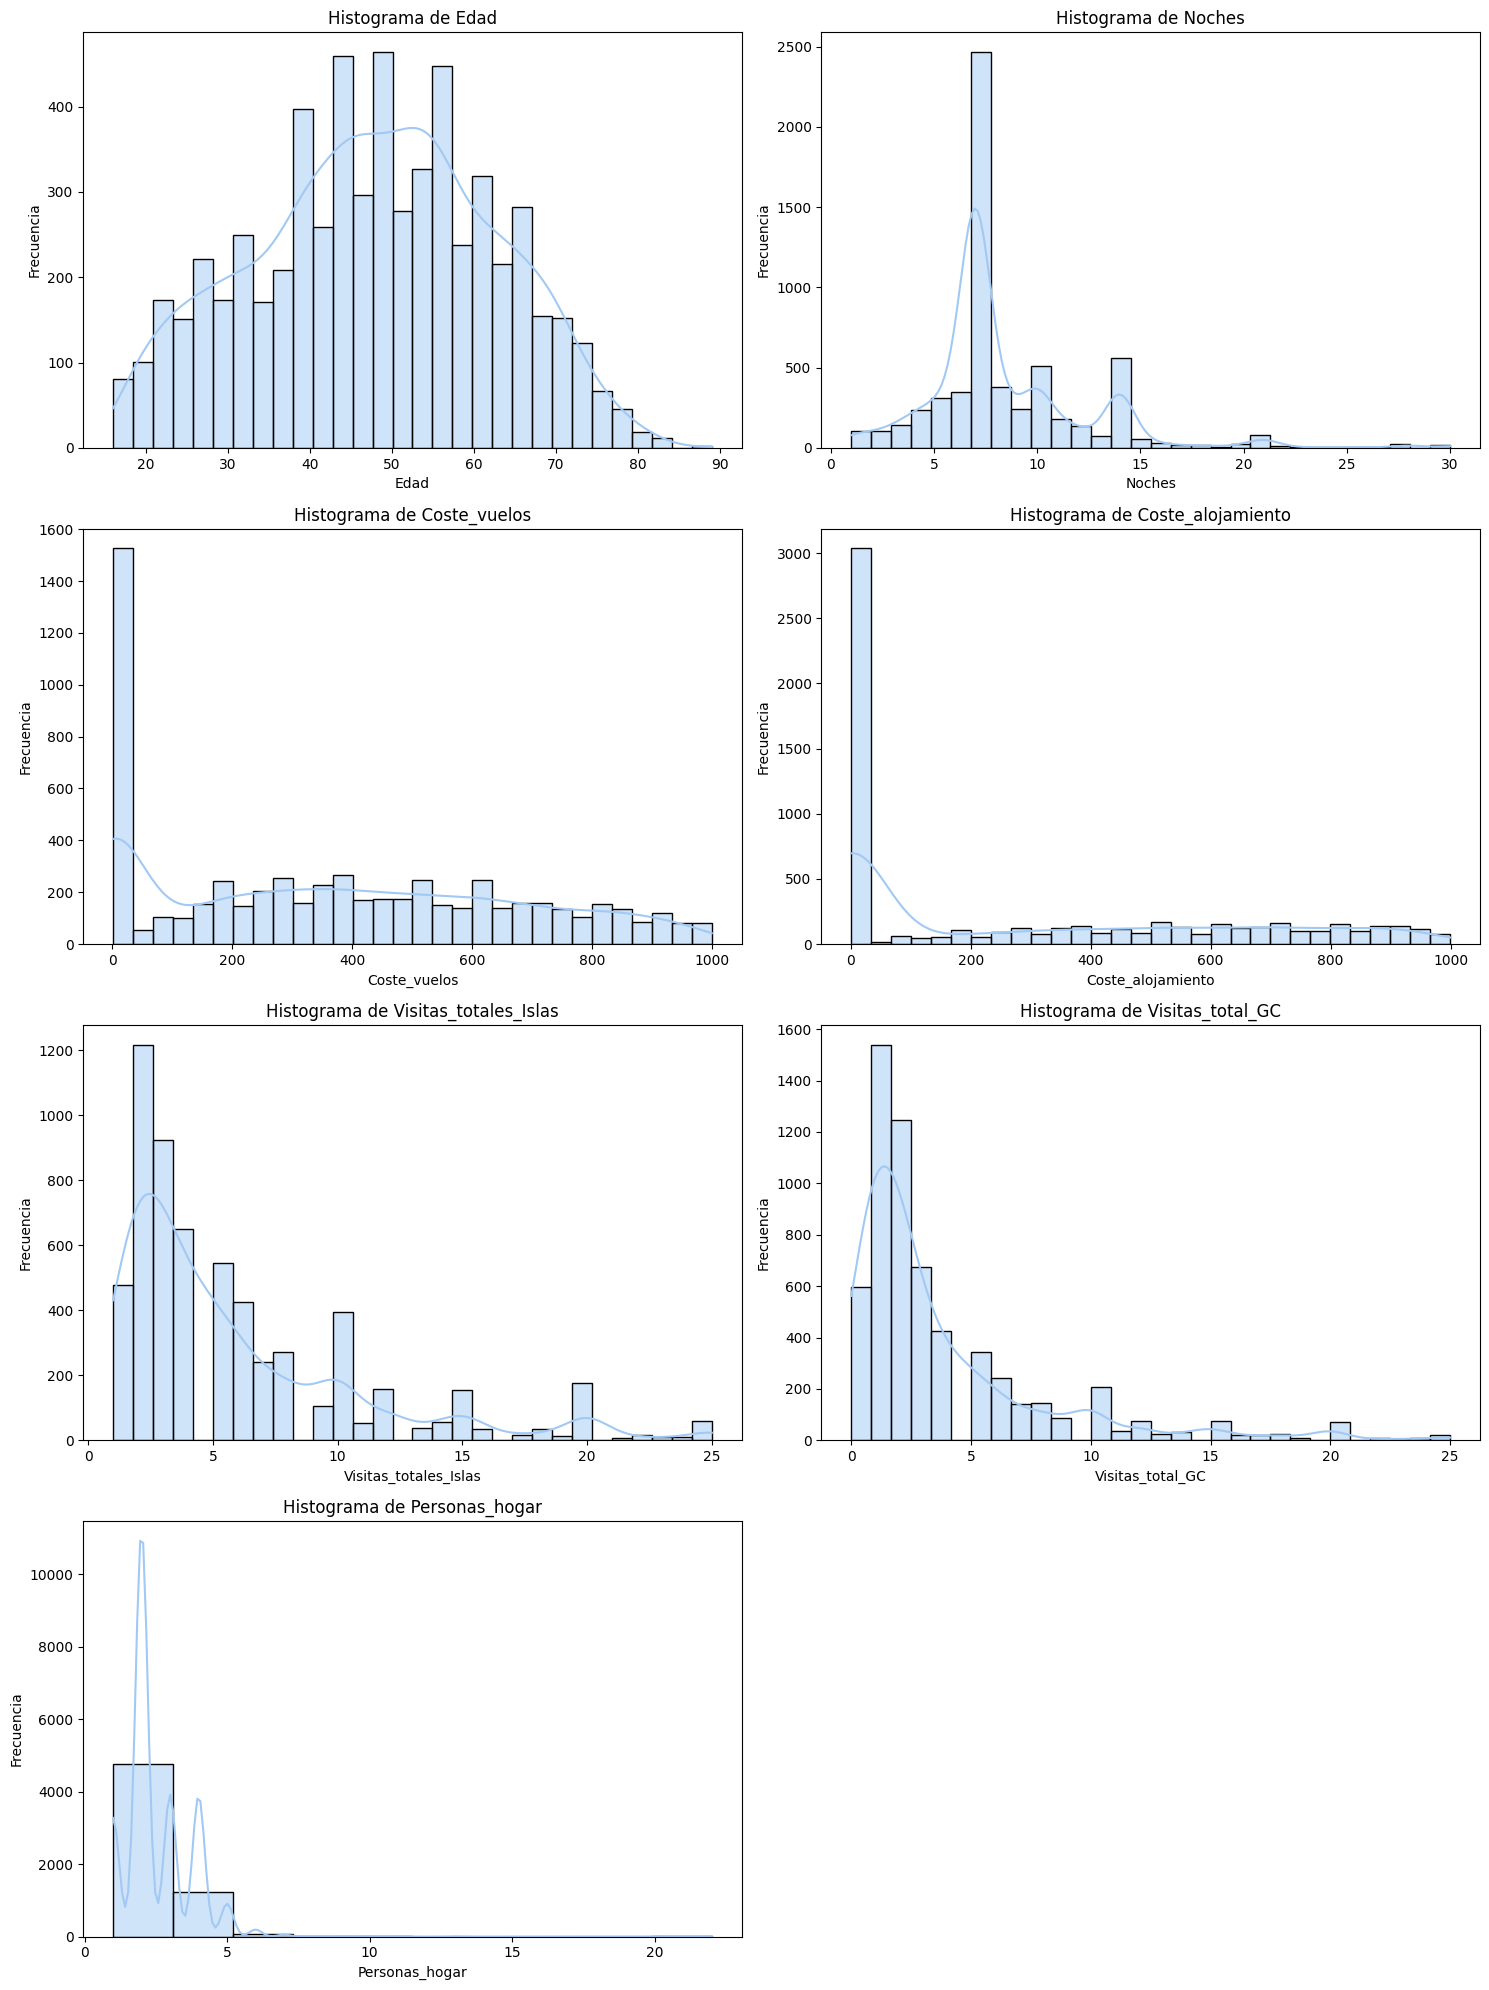

In [1526]:
plot_numerical_histograms(df_2019, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

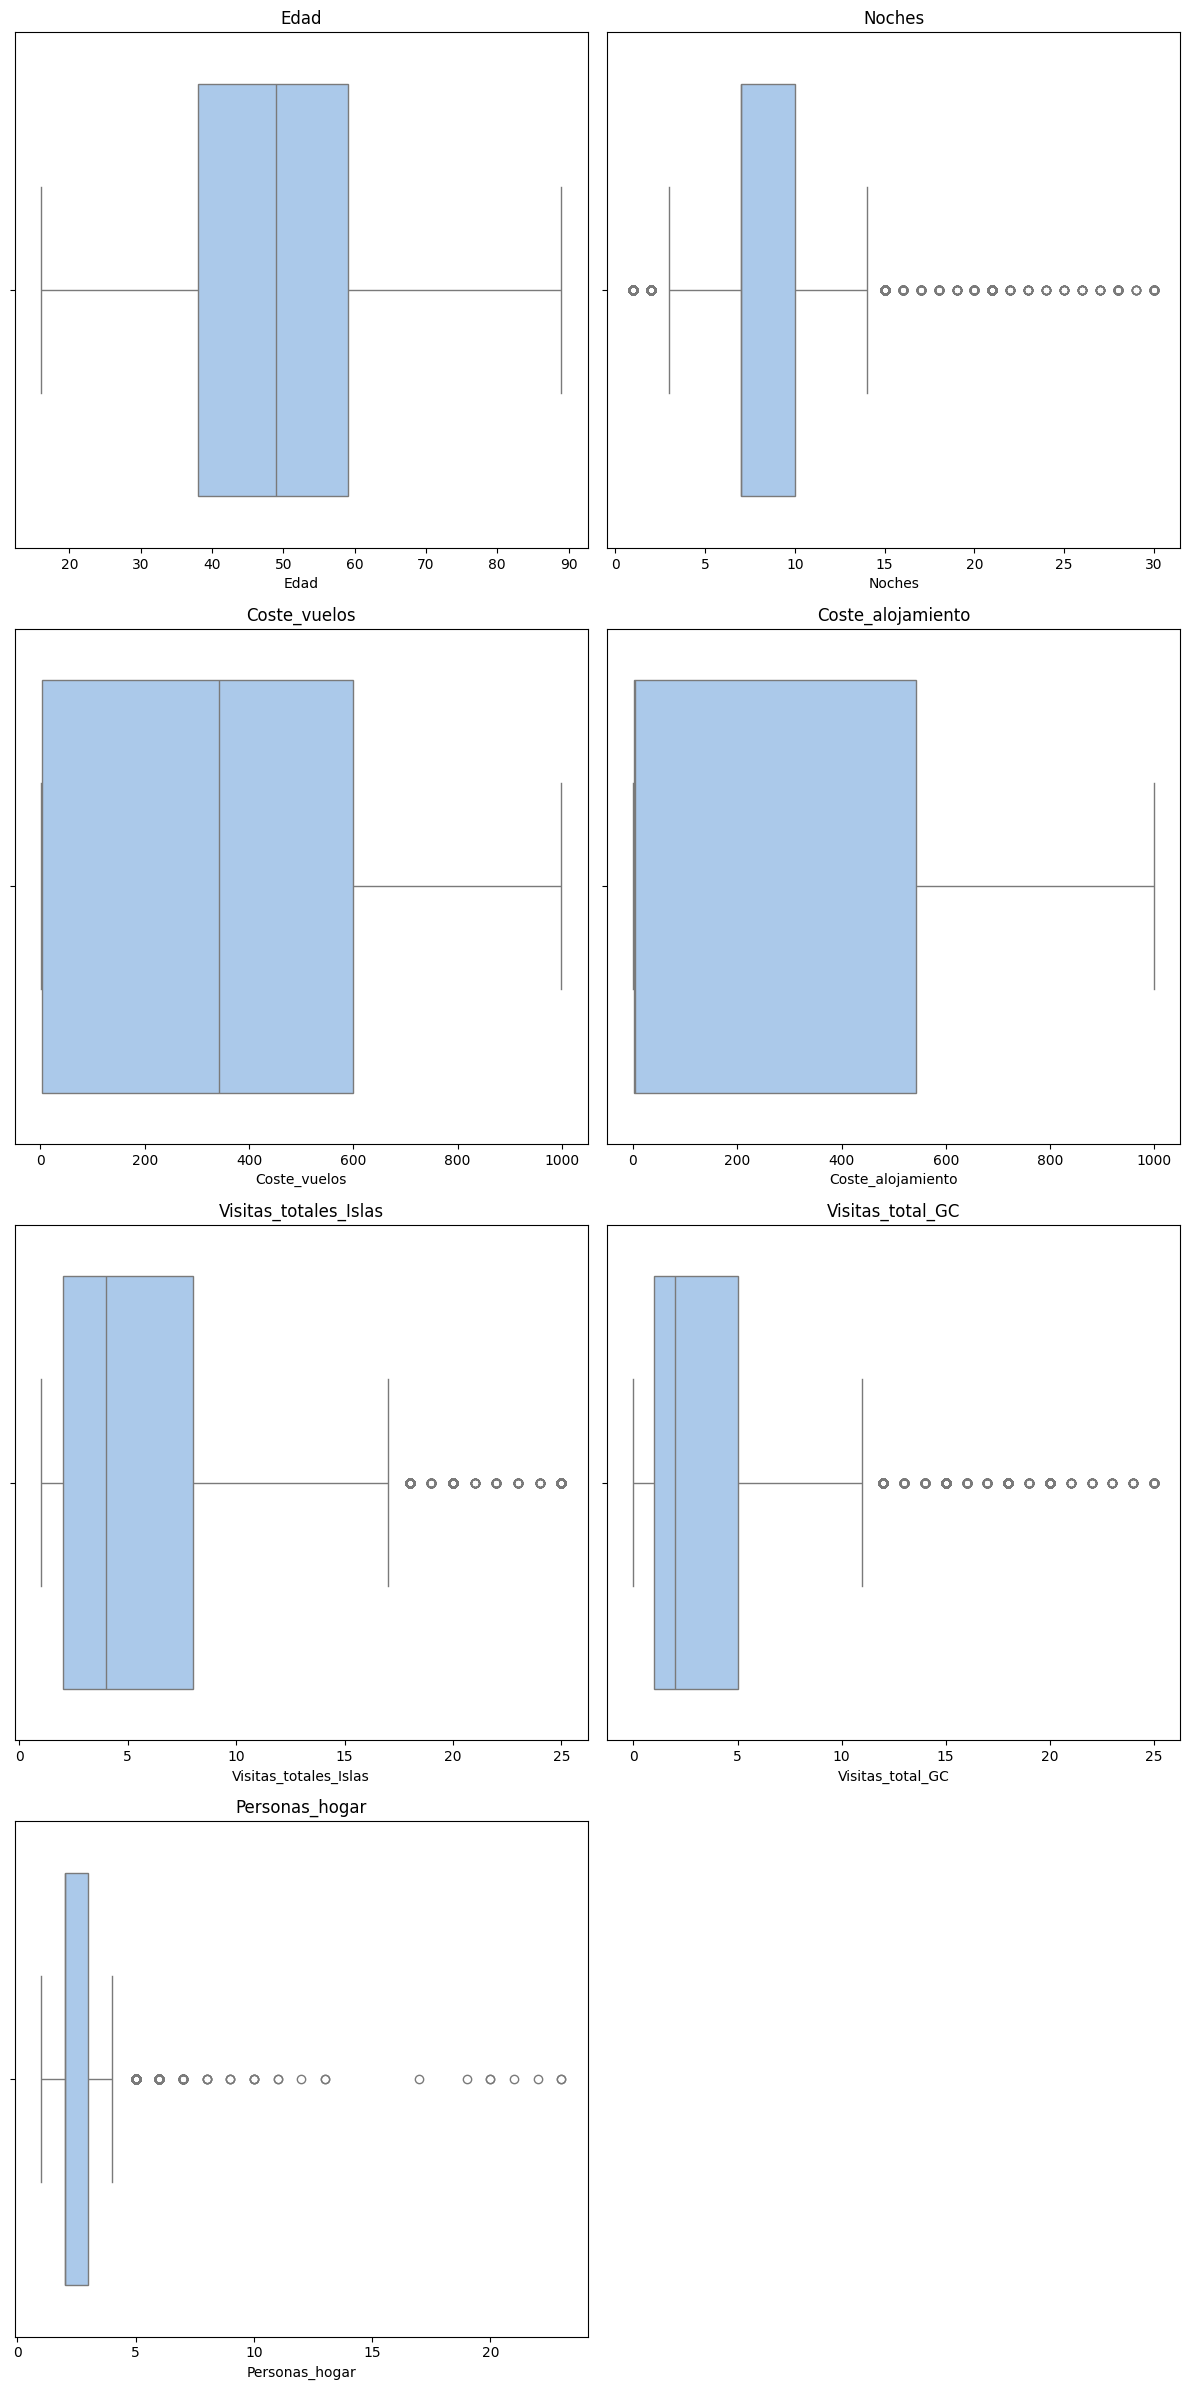

In [1527]:
plot_multiple_boxplots(df_perfil_turistico, variables_numericas)

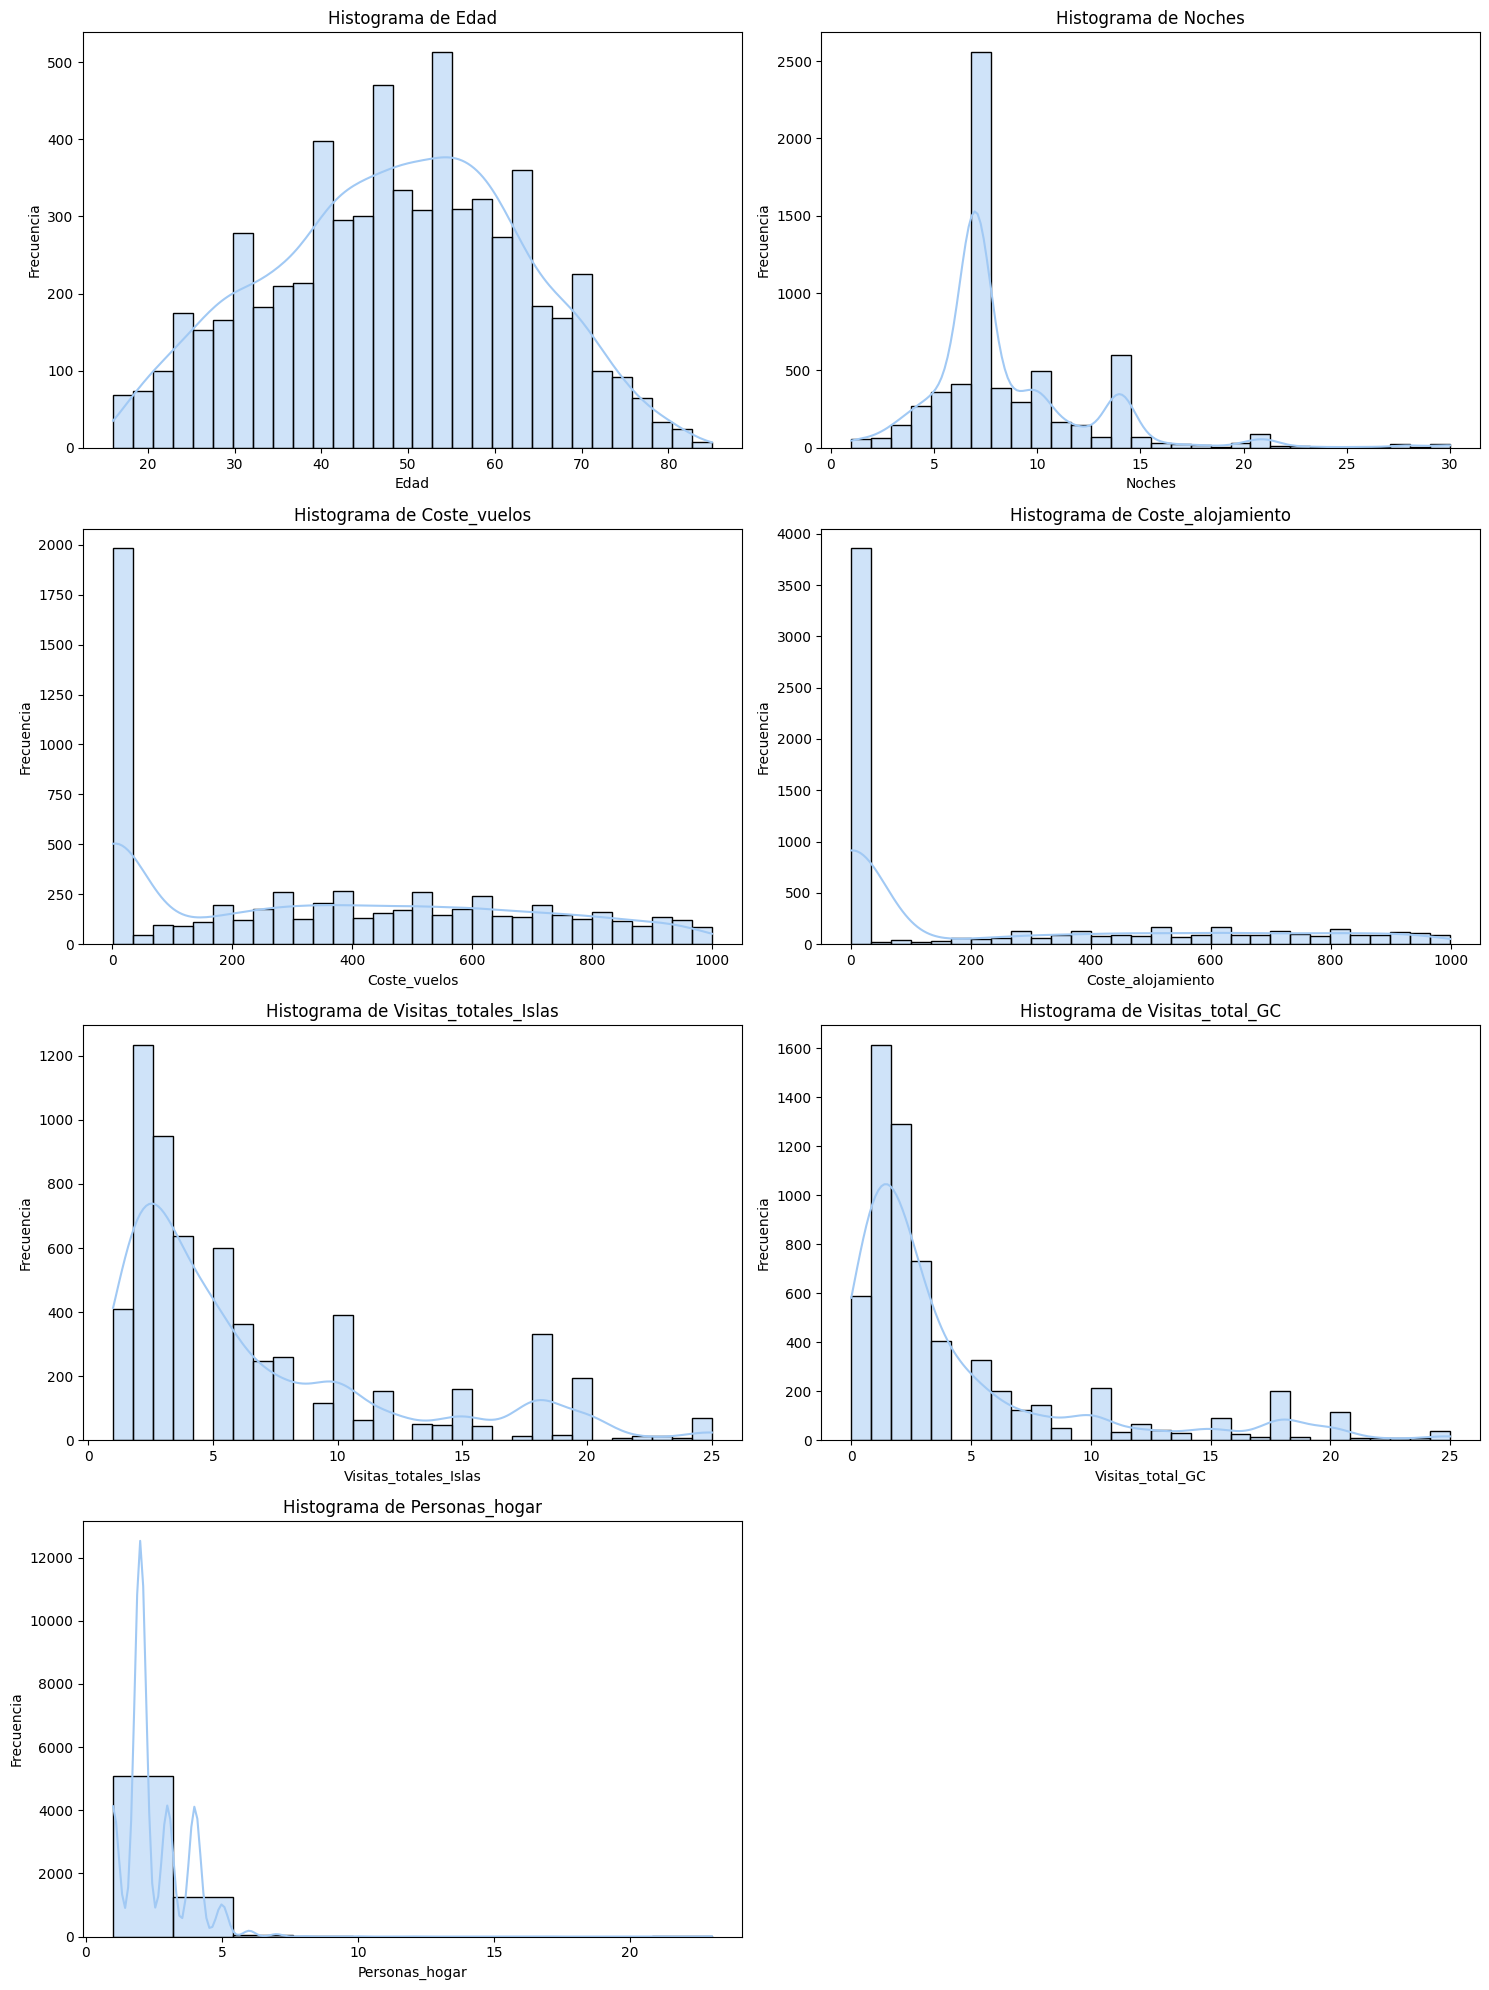

In [1528]:
plot_numerical_histograms(df_2022, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

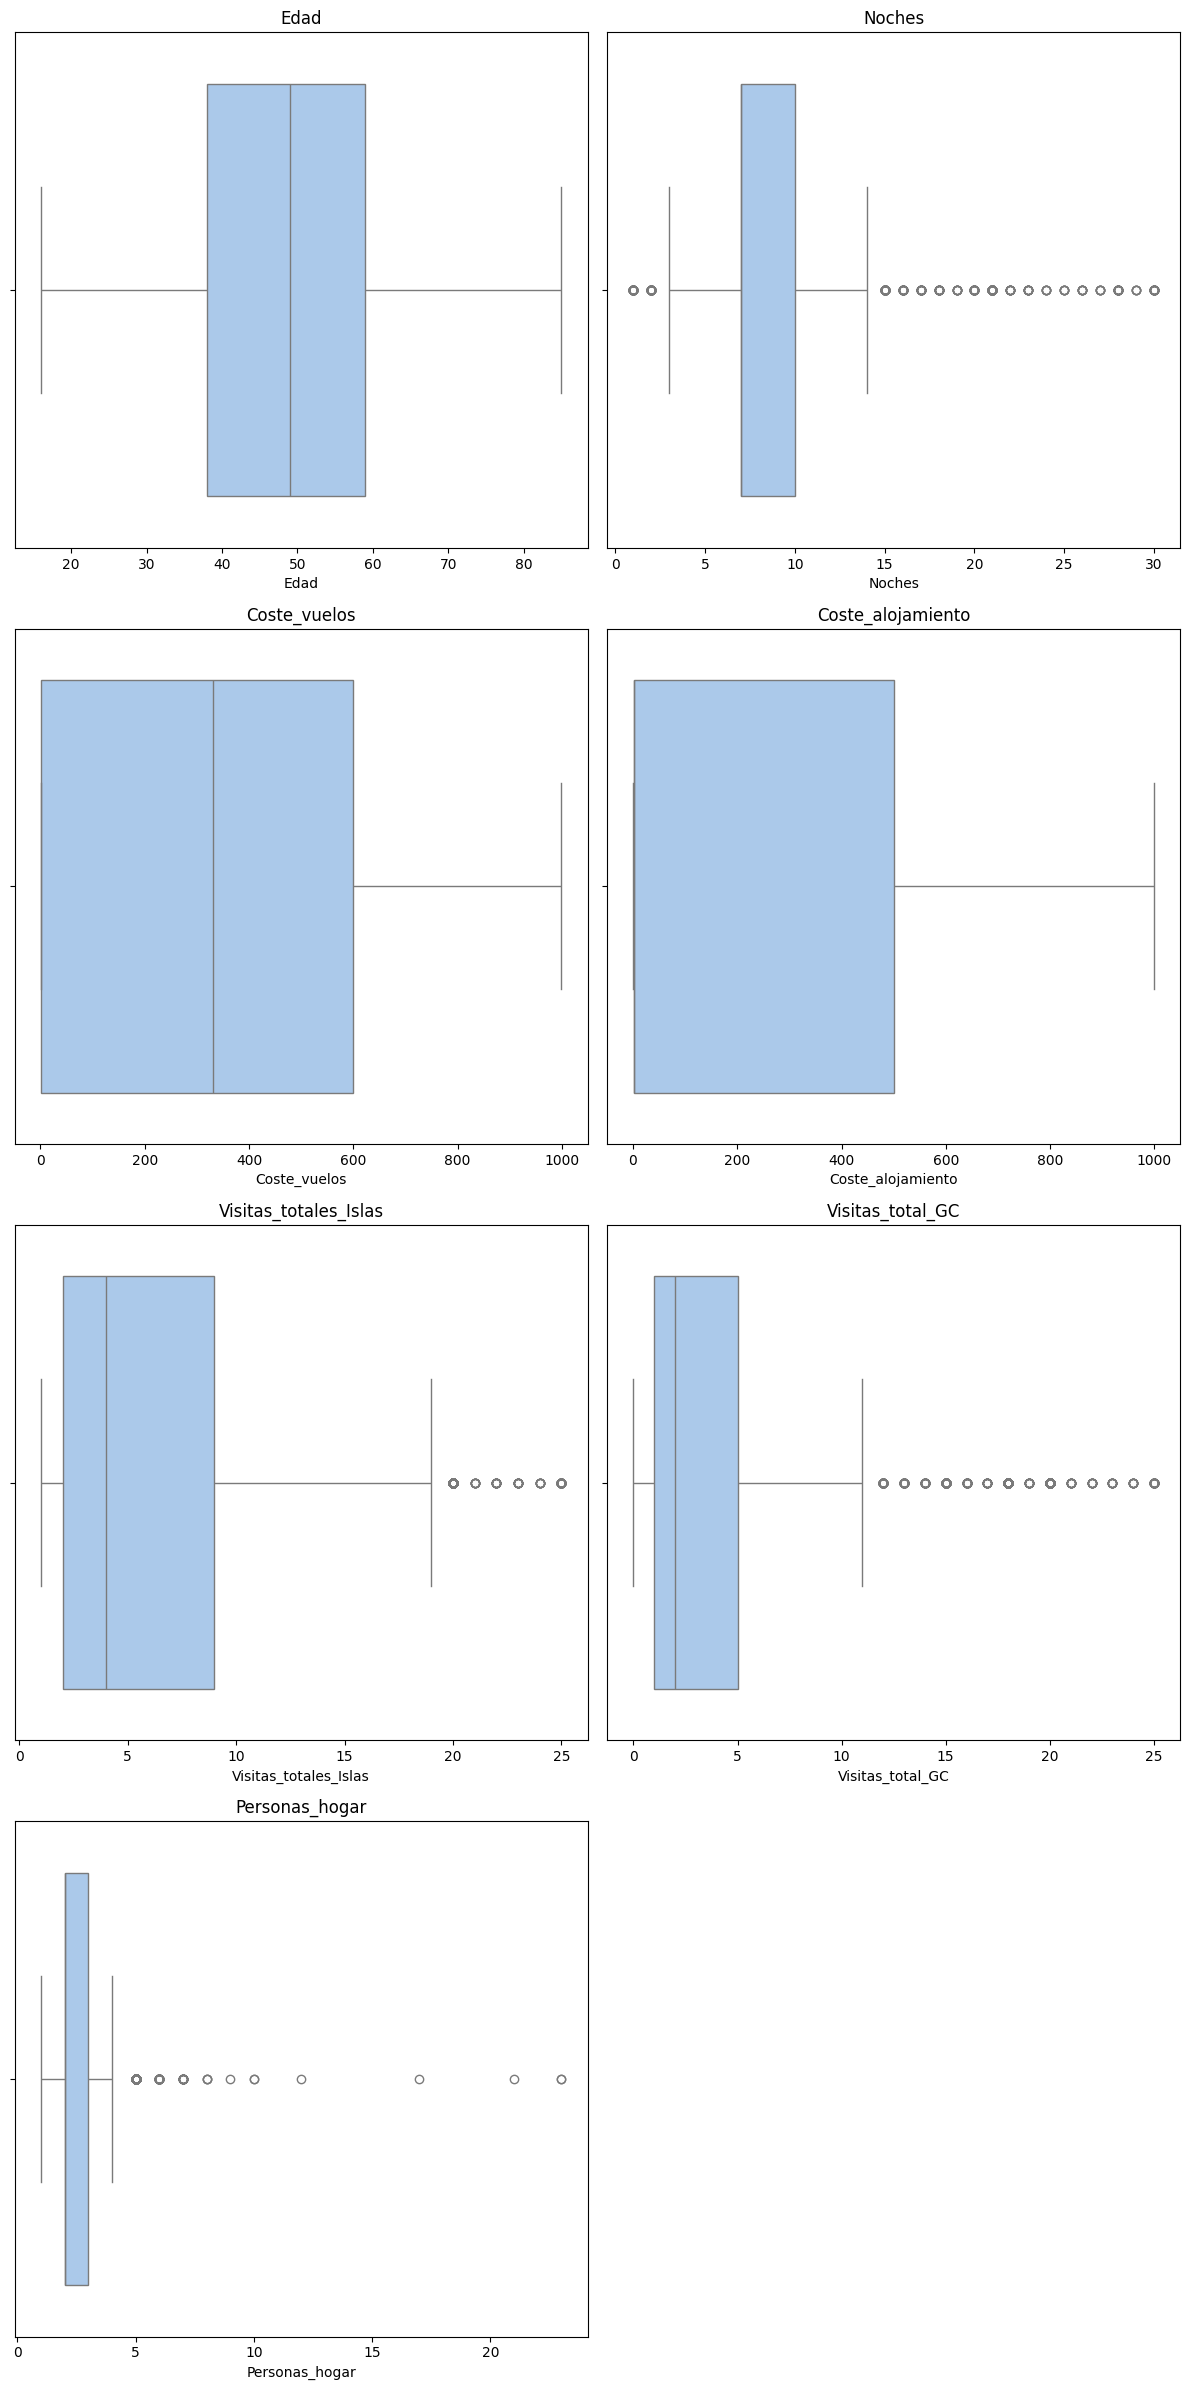

In [1529]:
plot_multiple_boxplots(df_2022, variables_numericas)

Con respecto a las variables numéricas se puede llegar a las siguientes conclusiones:

>Edad: la población se distribuye como una normal sin valores con outliers, hay edades entre 16-80 años y la población se concentra principalmente en la edad media.

>Noches: tiene una estructura Hypergeometric donde hay un salto importante en las 8 noche, donde se concentra bastante población.

>El resto de variables sigue una estructura log-Normal donde se demuestra una segmentación donde la mayoria de los turistas coinciden y luego el resto del comportamiento es como el de una normal.

>En general, no se observan variables muy dispersas pero si hay algunas con variables anómalos que lo comprobaremos con el CLV

In [1530]:
def variabilidad(df_perfil_turistico):
    # Seleccionar solo las columnas numéricas
    df_numericas = df_perfil_turistico.select_dtypes(include=["number"])
    
    # Calcular el resumen estadístico y seleccionar las filas de std y mean
    df_var = df_numericas.describe().loc[["std", "mean"]].T
    
    # Calcular el Coeficiente de Variación (CV)
    df_var["CV"] = df_var["std"] / df_var["mean"]
    
    return df_var

In [1531]:
variabilidad(df_perfil_turistico)

,std,mean,CV
Edad,14.496021,48.158421,0.301007
Noches,4.130648,8.513849,0.485168
Coste_vuelos,305.774892,360.346322,0.848558
Coste_alojamiento,331.153222,260.986216,1.268853
Visitas_totales_Islas,5.387624,6.273455,0.858797
Visitas_total_GC,4.809191,4.049151,1.187703
Personas_hogar,1.237699,2.518012,0.491538
Horas_fuera_alojamiento,4.119289,7.303794,0.563993
Año,1.499580,2020.537944,0.000742


Analizando las varianzas con respecto a la media, se confirma lo que hemos visto visualmente que hay variables que tienen un alta variabilidad como el coste del alojamiento y las visitas totales a Gran Canaria

In [1532]:
#Rangos
df_perfil_turistico.describe().loc["max"] - df_perfil_turistico.describe().loc["min"]

Edad                        73.0
Noches                      29.0
Coste_vuelos               998.0
Coste_alojamiento          998.0
Visitas_totales_Islas       24.0
Visitas_total_GC            25.0
Personas_hogar              22.0
Horas_fuera_alojamiento     24.0
Año                          3.0
dtype: float64

# ***Análisis bivariantes***

Es hora de ver si existe alguna relación entre las columnas o variables de nuestro dataset, relación que puede no existir (variables independientes), existir e indicar que las variables cambian más o menos al mismo tiempo (pero no necesariamente en el mismo sentido), situación que llamaremos correlación, y finalmente que haya una relación de cuasalidad (cuando una cambia conlleva que otra cambie como consecuencia de esto)

Para este estudio nos haremos preguntas concretas 

* Nacionalidad vs noches

Según la nacionalidad de procedencia, ¿influye el número de noches que pasa en la Isla?

¿Existen diferencias en el promedio de noches pasadas por los turistas de diferentes nacionalidades?

¿La duración de la estancia varía significativamente entre las nacionalidades?

¿Existen diferencias estadísticas significativas en la duración de la estancia entre los turistas de distintas nacionalidades?

In [1533]:
df_promedio_noches = df_perfil_turistico.groupby('Nacionalidad')['Noches'].mean().reset_index()
df_promedio_noches = df_promedio_noches.sort_values('Noches', ascending=False)
print(df_promedio_noches)

    Nacionalidad     Noches
9        Noruega  10.507747
0       Alemania   9.592676
15         Suiza   9.535519
11  Paises Bajos   9.375776
12  Países Bajos   9.011080
14        Suecia   8.987828
5      Finlandia   8.926606
6        Francia   8.725146
10         Otros   8.540299
8         Italia   8.459283
2        Bélgica   8.419355
1        Belgica   8.351955
3      Dinamarca   8.329519
13   Reino Unido   8.147445
7        Irlanda   8.042980
4         España   6.537913


Se demuestra que la media de noches que pasan los turistas de fuera de españa es a partir de las 8 noches, probablemente sea por el factor distancia, que prefieren hacer estancias largas debido a la legania.
Por otro lado, la estancia media de los españoles es de +6 noches.

C:\Users\Carol\AppData\Local\Temp\ipykernel_12364\3796780930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nacionalidad', y='Noches', data=df_perfil_turistico, palette='Pastel2')


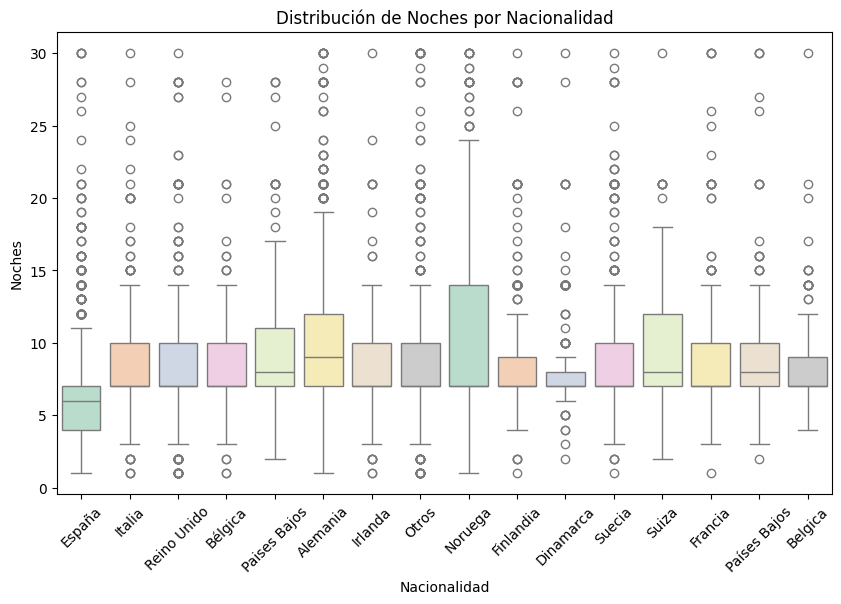

In [1534]:
# Graficar un boxplot de las noches por nacionalidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nacionalidad', y='Noches', data=df_perfil_turistico, palette='Pastel2')
plt.title('Distribución de Noches por Nacionalidad')
plt.xlabel('Nacionalidad')
plt.ylabel('Noches')
plt.xticks(rotation=45)
plt.show()


Visualización con un boxplot nos ayuda a identificar patrones generales y outliers.

In [1535]:
# Realizar un ANOVA para las nacionalidades
nacionalidades = df_perfil_turistico['Nacionalidad'].unique()
grupos = [df_perfil_turistico[df_perfil_turistico['Nacionalidad'] == nacionalidad]['Noches'] for nacionalidad in nacionalidades]

# ANOVA
f_stat, p_val = stats.f_oneway(*grupos)
print(f"F-statistic: {f_stat}, P-value: {p_val}")


F-statistic: 67.00001192149035, P-value: 1.5327464801280034e-196


El p-valor es menor que 0.05, rechazamos la hipótesis nula y concluimos que existen diferencias significativas en las noches pasadas entre las diferentes nacionalidades.

* Ingresos y tipo de alojamiento elegido

¿Existen diferencias en la elección de tipo de alojamiento según los ingresos?

¿Los turistas con ingresos más altos tienden a elegir un tipo de alojamiento diferente que aquellos con ingresos más bajos?
¿El tipo de alojamiento varía significativamente según los tramos de ingresos?

¿Cuál es la tendencia general en términos de tipo de alojamiento según los diferentes tramos de ingresos?

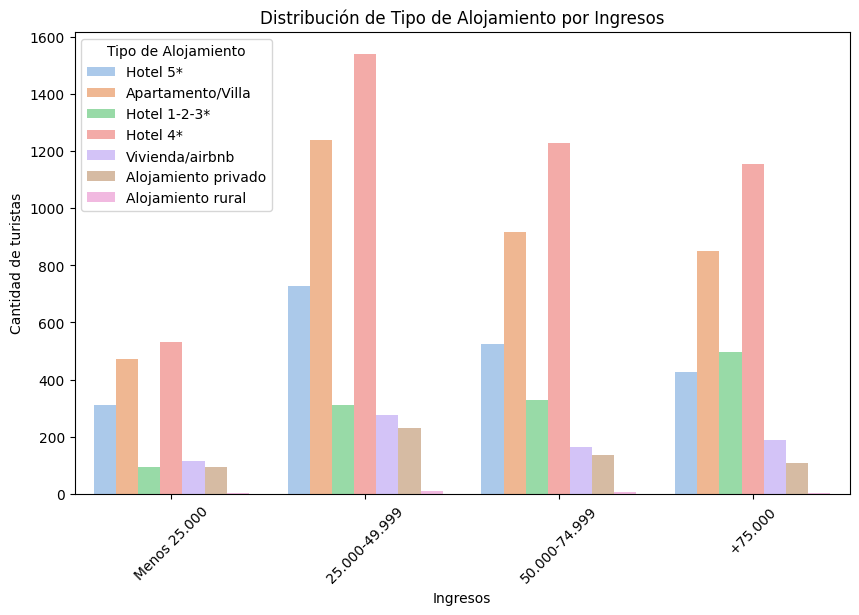

In [1536]:

# Crear un gráfico de barras apiladas mostrando la distribución del tipo de alojamiento por ingresos
plt.figure(figsize=(10, 6))
sns.countplot(data=df_perfil_turistico, x='Ingresos', hue='Tipo_alojamiento', palette='pastel')
plt.title('Distribución de Tipo de Alojamiento por Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Cantidad de turistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Alojamiento')
plt.show()


In [1537]:
# Crear una tabla de contingencia entre ingresos y tipo de alojamiento
tabla_contingencia = pd.crosstab(df_perfil_turistico['Ingresos'], df_perfil_turistico['Tipo_alojamiento'])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi2: {chi2}, P-value: {p}")


Chi2: 231.7665912294024, P-value: 4.0732806147834033e-39


El valor del estadítco es menor que 0.05, podemos rechazar la hipótesis nula y concluir que existe una relación significativa entre los ingresos y el tipo de alojamiento elegido.

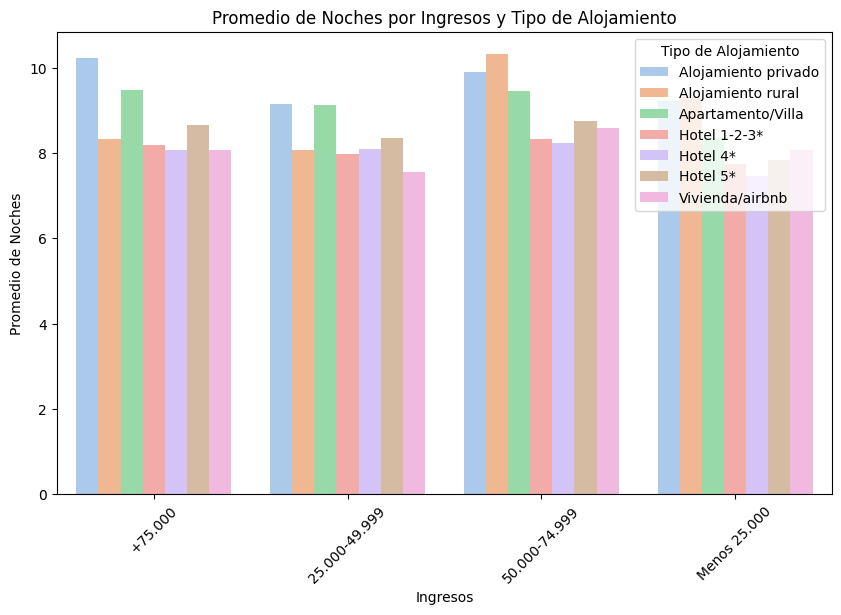

In [1538]:
df_promedio_noches = df_perfil_turistico.groupby(['Ingresos', 'Tipo_alojamiento'])['Noches'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_promedio_noches, x='Ingresos', y='Noches', hue='Tipo_alojamiento', palette='pastel')
plt.title('Promedio de Noches por Ingresos y Tipo de Alojamiento')
plt.xlabel('Ingresos')
plt.ylabel('Promedio de Noches')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Alojamiento')
plt.show()


Este gráfico muestra que a mayores ingresos tienden prefieren tipos de alojamiento específicos como alojamientos privados, Villas y Hoteles de 5*, sin embargo, el promedio de noche se mantiene casi igual para cada tramo de ingresos, con la execpción del alojamiento rural en tercer tramo de ingreso

* Edad vs Visistas totales a Gran Canaria

¿Hay una relación entre la edad y el número de visitas a Gran Canaria?

¿Las personas más jóvenes visitan Gran Canaria con más o menos frecuencia que las personas mayores?

¿Cómo varía el número de visitas según los diferentes grupos de edad?

¿Existen grupos de edad específicos que realicen más visitas a Gran Canaria?
¿La edad predice cuántas veces un turista ha visitado Gran Canaria?

¿Podemos identificar tendencias en los turistas jóvenes o mayores en cuanto a las visitas a Gran Canaria?

C:\Users\Carol\AppData\Local\Temp\ipykernel_12364\2741155908.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_promedio_visitas = df_perfil_turistico.groupby('Rango_edad')['Visitas_total_GC'].mean().reset_index()
C:\Users\Carol\AppData\Local\Temp\ipykernel_12364\2741155908.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedio_visitas, x='Rango_edad', y='Visitas_total_GC', palette='pastel')


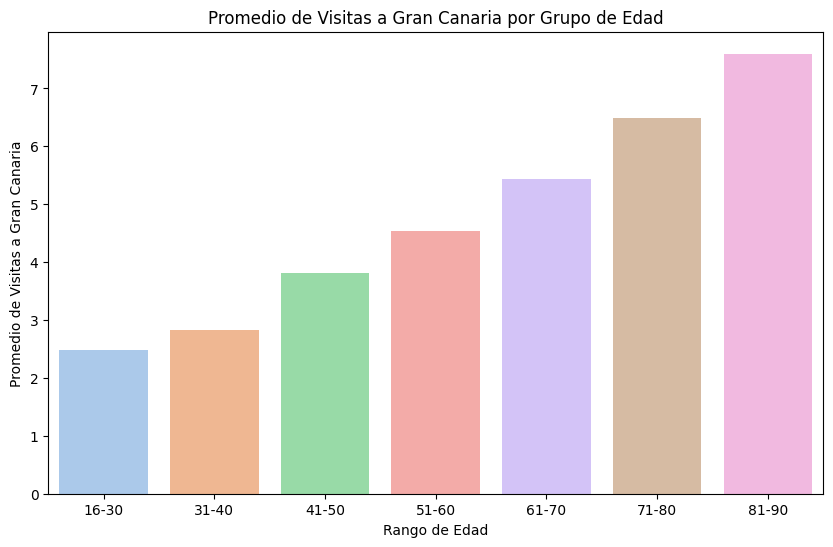

In [1539]:
# Definir rangos de edad
bins = [16, 30, 40, 50, 60, 70, 80, 90]
labels = ['16-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

df_perfil_turistico['Rango_edad'] = pd.cut(df_perfil_turistico['Edad'], bins=bins, labels=labels)

# Calcular el promedio de visitas para cada rango de edad
df_promedio_visitas = df_perfil_turistico.groupby('Rango_edad')['Visitas_total_GC'].mean().reset_index()

# Graficar el promedio de visitas por grupo de edad
plt.figure(figsize=(10, 6))
sns.barplot(data=df_promedio_visitas, x='Rango_edad', y='Visitas_total_GC', palette='pastel')
plt.title('Promedio de Visitas a Gran Canaria por Grupo de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Promedio de Visitas a Gran Canaria')
plt.show()



Este gráfico nos da una idea clara de cómo el número de visitas cambia según el grupo de edad, a mayor edad, más visita la isla, lo cual tiene sentido porque te da más oportunidades de volver a repetir

In [1540]:
# Calcular la correlación de Pearson entre Edad y Visitas_total_GC
corr, p_value = pearsonr(df_perfil_turistico['Edad'], df_perfil_turistico['Visitas_total_GC'])
print(f"Correlación: {corr}, P-value: {p_value}")


Correlación: 0.23760784720359585, P-value: 7.287899574832176e-160


Como era de esperar, existe una fuerte relación entre la edad y el número de visitas a la isla